# Financial Inclusion in Africa 

### Importing libraries

In [150]:
# dataframe and plotting
import pandas as pd
import umpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# machine learning
from lightgbm import LGBMClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from pandas_profiling import ProfileReport

#from google.colab import files
import warnings
warnings.filterwarnings('ignore')

### Load the dataset

In [151]:
# Load files into a pandas dataframe
train = pd.read_csv('Train.csv')
test = pd.read_csv('Test.csv')
ss = pd.read_csv('SampleSubmission.csv')
variables = pd.read_csv('VariableDefinitions.csv')

### Exploratory Data Analysis

In [152]:
# Let’s observe the shape of our datasets.
print('train data shape :', train.shape)
print('test data shape :', test.shape)

train data shape : (23524, 13)
test data shape : (10086, 12)


In [153]:
# inspect train data
train.head()

,country,year,uniqueid,bank_account,location_type,cellphone_access,household_size,age_of_respondent,gender_of_respondent,relationship_with_head,marital_status,education_level,job_type
0,Kenya,2018,uniqueid_1,Yes,Rural,Yes,3,24,Female,Spouse,Married/Living together,Secondary education,Self employed
1,Kenya,2018,uniqueid_2,No,Rural,No,5,70,Female,Head of Household,Widowed,No formal education,Government Dependent
2,Kenya,2018,uniqueid_3,Yes,Urban,Yes,5,26,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed
3,Kenya,2018,uniqueid_4,No,Rural,Yes,5,34,Female,Head of Household,Married/Living together,Primary education,Formally employed Private
4,Kenya,2018,uniqueid_5,No,Urban,No,8,26,Male,Child,Single/Never Married,Primary education,Informally employed


In [154]:
# Check for missing values
print('missing values:', train.isnull().sum())

missing values: country                   0
year                      0
uniqueid                  0
bank_account              0
location_type             0
cellphone_access          0
household_size            0
age_of_respondent         0
gender_of_respondent      0
relationship_with_head    0
marital_status            0
education_level           0
job_type                  0
dtype: int64


We don't have missing data in our dataset.



<AxesSubplot:>

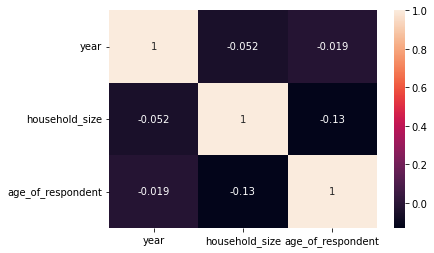

In [155]:
#check for corellation
cor=train.corr()
sns.heatmap(cor, annot=True)

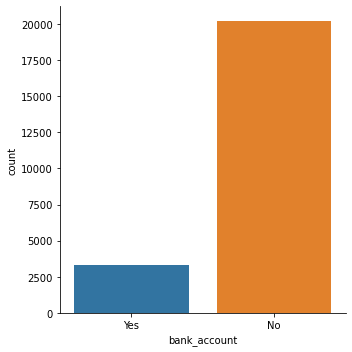

In [156]:
# Explore Target distribution 
sns.catplot(x="bank_account", kind="count", data=train)

In [157]:
test.head()

,country,year,uniqueid,location_type,cellphone_access,household_size,age_of_respondent,gender_of_respondent,relationship_with_head,marital_status,education_level,job_type
0,Kenya,2018,uniqueid_6056,Urban,Yes,3,30,Male,Head of Household,Married/Living together,Secondary education,Formally employed Government
1,Kenya,2018,uniqueid_6060,Urban,Yes,7,51,Male,Head of Household,Married/Living together,Vocational/Specialised training,Formally employed Private
2,Kenya,2018,uniqueid_6065,Rural,No,3,77,Female,Parent,Married/Living together,No formal education,Remittance Dependent
3,Kenya,2018,uniqueid_6072,Rural,No,6,39,Female,Head of Household,Married/Living together,Primary education,Remittance Dependent
4,Kenya,2018,uniqueid_6073,Urban,No,3,16,Male,Child,Single/Never Married,Secondary education,Remittance Dependent


In [158]:
# Check for missing values
print('missing values:', test.isnull().sum())

missing values: country                   0
year                      0
uniqueid                  0
location_type             0
cellphone_access          0
household_size            0
age_of_respondent         0
gender_of_respondent      0
relationship_with_head    0
marital_status            0
education_level           0
job_type                  0
dtype: int64


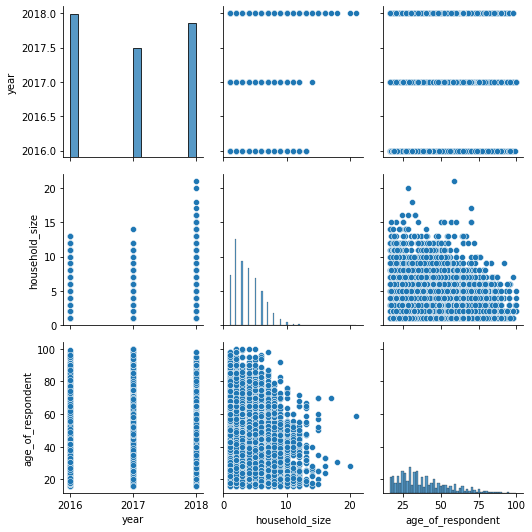

In [159]:
sns.pairplot(train, height=2.5)
plt.tight_layout()

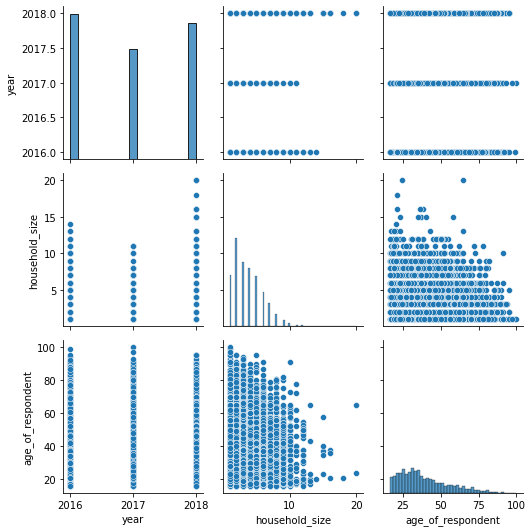

In [160]:
sns.pairplot(test, height=2.5)
plt.tight_layout()

In [288]:
cols = train.columns
num_cols = train._get_numeric_data().columns
list2 = list(num_cols)
list1= list(set(cols)- set(num_cols))


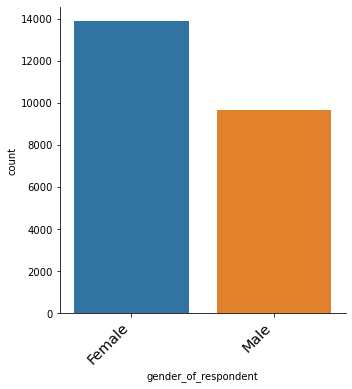

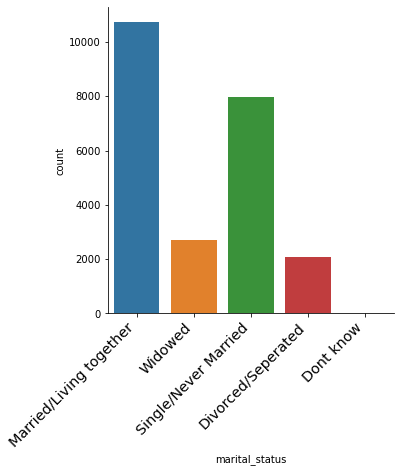

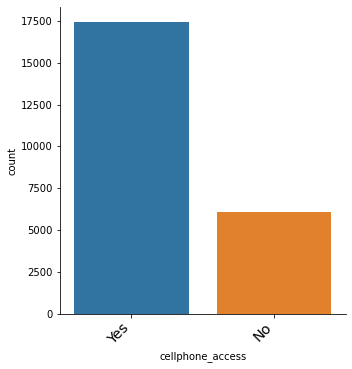

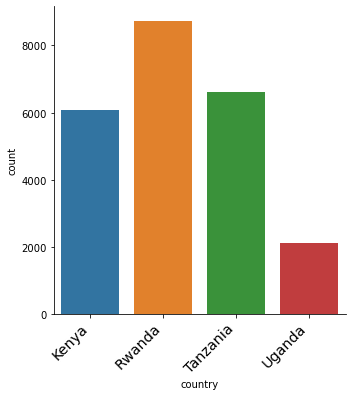

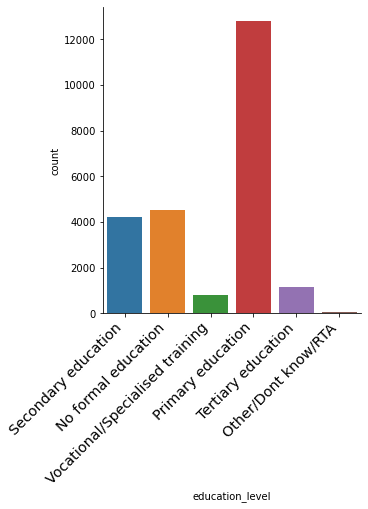

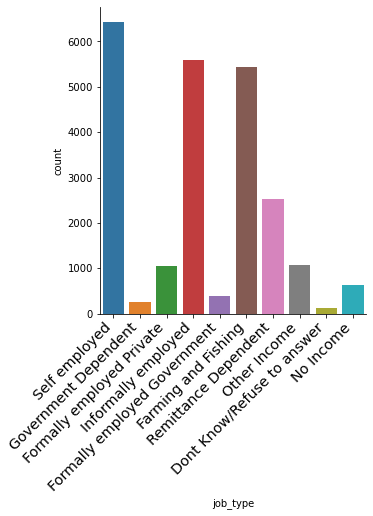

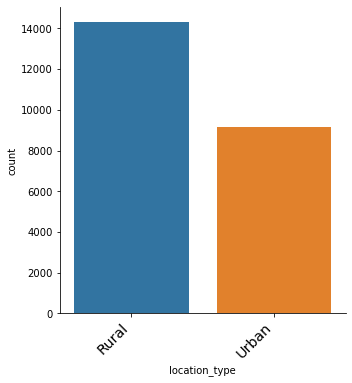

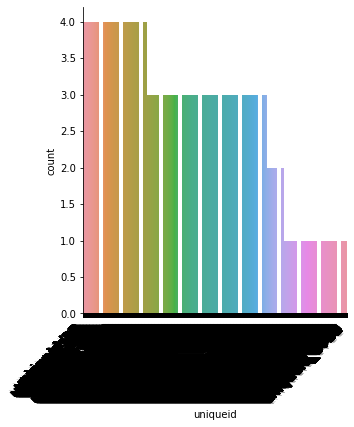

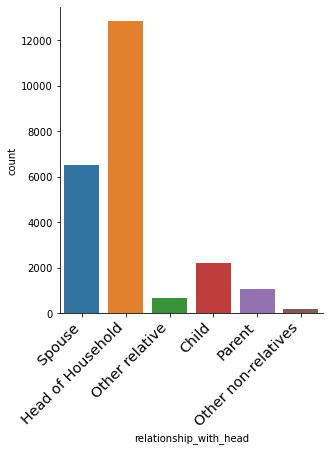

In [289]:
for column in list1:
   sns.catplot(x=column, kind="count", data=train)
   plt.xticks( 
           rotation=45,  
           horizontalalignment='right', 
           fontweight='light', 
           fontsize='x-large' 
)

In [162]:
num_cols

Index(['year', 'household_size', 'age_of_respondent'], dtype='object')

Text(0.5, 0, 'Household  size')

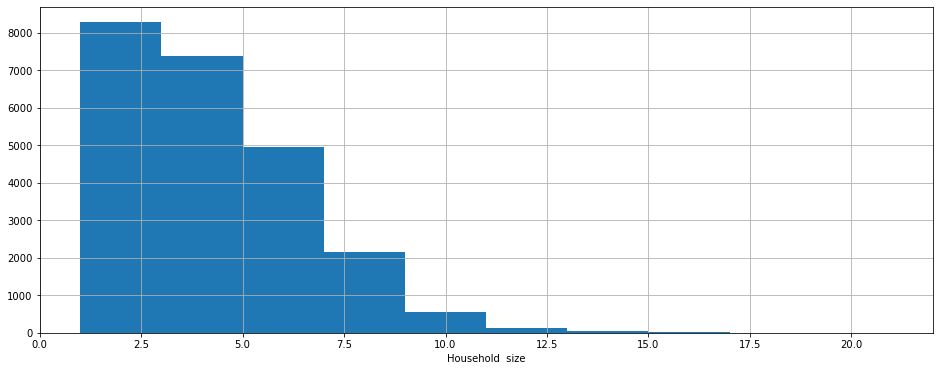

In [163]:

    plt.figure(figsize=(16, 6))
    train.household_size.hist() 
    plt.xlabel('Household  size')

Text(0.5, 0, 'age_of_respondent  size')

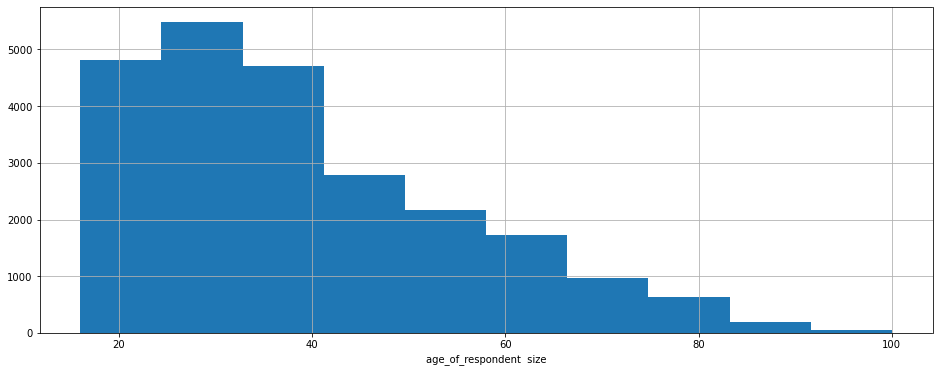

In [164]:
plt.figure(figsize=(16, 6))
train.age_of_respondent.hist() 
plt.xlabel('age_of_respondent  size')

In [165]:
train.head()

,country,year,uniqueid,bank_account,location_type,cellphone_access,household_size,age_of_respondent,gender_of_respondent,relationship_with_head,marital_status,education_level,job_type
0,Kenya,2018,uniqueid_1,Yes,Rural,Yes,3,24,Female,Spouse,Married/Living together,Secondary education,Self employed
1,Kenya,2018,uniqueid_2,No,Rural,No,5,70,Female,Head of Household,Widowed,No formal education,Government Dependent
2,Kenya,2018,uniqueid_3,Yes,Urban,Yes,5,26,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed
3,Kenya,2018,uniqueid_4,No,Rural,Yes,5,34,Female,Head of Household,Married/Living together,Primary education,Formally employed Private
4,Kenya,2018,uniqueid_5,No,Urban,No,8,26,Male,Child,Single/Never Married,Primary education,Informally employed


In [166]:
test.head()

,country,year,uniqueid,location_type,cellphone_access,household_size,age_of_respondent,gender_of_respondent,relationship_with_head,marital_status,education_level,job_type
0,Kenya,2018,uniqueid_6056,Urban,Yes,3,30,Male,Head of Household,Married/Living together,Secondary education,Formally employed Government
1,Kenya,2018,uniqueid_6060,Urban,Yes,7,51,Male,Head of Household,Married/Living together,Vocational/Specialised training,Formally employed Private
2,Kenya,2018,uniqueid_6065,Rural,No,3,77,Female,Parent,Married/Living together,No formal education,Remittance Dependent
3,Kenya,2018,uniqueid_6072,Rural,No,6,39,Female,Head of Household,Married/Living together,Primary education,Remittance Dependent
4,Kenya,2018,uniqueid_6073,Urban,No,3,16,Male,Child,Single/Never Married,Secondary education,Remittance Dependent


### Encoding Categorical Variables

In [167]:
#impor preprocessing module
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler

# Cobvert target label to numerical Data
le = LabelEncoder()
train['bank_account'] = le.fit_transform(train['bank_account'])

#Separate training features from target
X_train = train.drop(['bank_account'], axis=1)
y_train = train['bank_account']

print(y_train)

0        1
1        0
2        1
3        0
4        0
        ..
23519    0
23520    0
23521    0
23522    0
23523    0
Name: bank_account, Length: 23524, dtype: int32


In [168]:
X_train.head()

,country,year,uniqueid,location_type,cellphone_access,household_size,age_of_respondent,gender_of_respondent,relationship_with_head,marital_status,education_level,job_type
0,Kenya,2018,uniqueid_1,Rural,Yes,3,24,Female,Spouse,Married/Living together,Secondary education,Self employed
1,Kenya,2018,uniqueid_2,Rural,No,5,70,Female,Head of Household,Widowed,No formal education,Government Dependent
2,Kenya,2018,uniqueid_3,Urban,Yes,5,26,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed
3,Kenya,2018,uniqueid_4,Rural,Yes,5,34,Female,Head of Household,Married/Living together,Primary education,Formally employed Private
4,Kenya,2018,uniqueid_5,Urban,No,8,26,Male,Child,Single/Never Married,Primary education,Informally employed


In [176]:
X_train.shape

(23524, 12)

In [169]:
# function to preprocess our data from train models
def preprocessing_data(data):

    # Convert the following numerical labels from interger to float
    float_array = data[["household_size", "age_of_respondent", "year"]].values.astype(float)
    
    # categorical features to be onverted to One Hot Encoding
    categ = ["relationship_with_head",
             "marital_status",
             "education_level",
             "job_type",
             "country"]
    
    # One Hot Encoding conversion
    data = pd.get_dummies(data, prefix_sep="_", columns=categ)
   
    
    # Label Encoder conversion
    data["location_type"] = le.fit_transform(data["location_type"])
    data["cellphone_access"] = le.fit_transform(data["cellphone_access"])
    data["gender_of_respondent"] = le.fit_transform(data["gender_of_respondent"])
    
    
    
    # drop uniquid column
    data = data.drop(["uniqueid"], axis=1)
    
    # scale our data into range of 0 and 1
    scaler = MinMaxScaler(feature_range=(0, 1))
    data = scaler.fit_transform(data)
    
    return data  

In [226]:
X_train1=preprocessing_data(X_train)
test1=preprocessing_data(test)

In [171]:
X_train1

array([[1., 0., 1., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 1., 1., ..., 0., 0., 0.],
       ...,
       [1., 0., 1., ..., 0., 0., 1.],
       [1., 1., 1., ..., 0., 0., 1.],
       [1., 0., 1., ..., 0., 0., 1.]])

In [177]:
X_train2 = pd.DataFrame(X_train1)
X_train2

,0,1,2,3,4,5,6,7,8,9,...,27,28,29,30,31,32,33,34,35,36
0,1.0,0.0,1.0,0.10,0.095238,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
1,1.0,0.0,0.0,0.20,0.642857,0.0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,1.0,1.0,1.0,0.20,0.119048,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
3,1.0,0.0,1.0,0.20,0.214286,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,1.0,1.0,0.0,0.35,0.119048,1.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23519,1.0,0.0,1.0,0.15,0.380952,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
23520,1.0,0.0,1.0,0.05,0.130952,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
23521,1.0,0.0,1.0,0.20,0.130952,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
23522,1.0,1.0,1.0,0.30,0.166667,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0


### Modeling

In [108]:
import sklearn.model_selection

In [269]:
# Split train_data
from sklearn.model_selection import train_test_split

X_Train, X_Val, y_Train, y_val = train_test_split(X_train2, y_train, stratify = y_train, 
                                                  test_size = 0.1, random_state=42)

In [270]:
X_Train.shape, X_Val.shape, y_Train.shape, y_val.shape

((21171, 37), (2353, 37), (21171,), (2353,))

### Using xgbosst

In [111]:
#import classifier algorithm here
from xgboost import XGBClassifier

# create models
xg_model = XGBClassifier()

#fitting the models
xg_model.fit(X_Train,y_Train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)

In [112]:
# import evaluation metrics
from sklearn.metrics import confusion_matrix, accuracy_score

# evaluate the model
xg_y_model = xg_model.predict(X_Val)

# Get error rate
print("Error rate of XGB classifier: ", 1 - accuracy_score(y_val, xg_y_model))

Error rate of XGB classifier:  0.10752231194220141


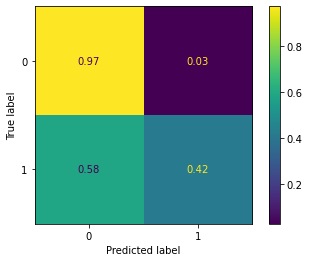

In [113]:
from sklearn.metrics import plot_confusion_matrix

# Get confusion matrix for Gradient Boosting Classifier
plot_confusion_matrix(xg_model,X_Val, y_val,normalize='true')

In [114]:
# Import GridSearchCV
from sklearn.model_selection import GridSearchCV

# Optimize model parameters
# I run this code in google colab to make the execution much faster and use the best params in the next code
param_grid = {'min_child_weighth': [1, 5, 10],
        'gamma': [0.5, 1],
        'subsample': [0.6, 0.8, 1.0],
        'max_depth': [3, 5]
        }
my_xgb_model = GridSearchCV(xg_model, param_grid,n_jobs=-1,verbose=2,cv=5)
my_xgb_model.fit(X_train1, y_train)
print(my_xgb_model.best_params_) 

Fitting 5 folds for each of 36 candidates, totalling 180 fits
[09:03:47] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "min_child_weighth" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


{'gamma': 0.5, 'max_depth': 3, 'min_child_weighth': 1, 'subsample': 0.8}


In [115]:
from sklearn.metrics import confusion_matrix, accuracy_score

# fit by setting best parameters and Evaluate model
xgb_model = XGBClassifier(min_child_weight=1, gamma=0.5, subsample=0.8, max_depth=3)

xgb_model.fit(X_train1, y_train)
y_pred = xgb_model.predict(X_Val)

# Get error rate
print("Error rate of the XGB classifier: ", 1 - accuracy_score(y_val, y_pred))

Error rate of the XGB classifier:  0.10369740756481083


In [116]:
test.bank_account = xgb_model.predict(test1)

In [117]:
# Create submission DataFrame
submission = pd.DataFrame({"uniqueid": test["uniqueid"] + " x " + test["country"],
                           "bank_account": test.bank_account})

In [118]:
#show the five sample
submission.sample(5)

,uniqueid,bank_account
6507,uniqueid_6782 x Tanzania,0
557,uniqueid_6626 x Kenya,0
8705,uniqueid_8980 x Tanzania,0
106,uniqueid_6175 x Kenya,0
6980,uniqueid_7255 x Tanzania,0


In [119]:
# Create submission csv file csv file
submission.to_csv('first_submission.csv', index = False)
 

Re-modeling with balanced data

In [120]:
X_train.shape , y_train.shape

((23524, 12), (23524,))

In [121]:
from imblearn.over_sampling import SMOTE
sm=SMOTE(random_state=2)
X_train_s , y_train_s = sm.fit_resample(X_train1, y_train)

In [122]:
X_train_s.shape , y_train_s.shape

((40424, 37), (40424,))

In [123]:
# Split train_data
from sklearn.model_selection import train_test_split

X_Train, X_Val, y_Train, y_val = train_test_split(X_train_s, y_train_s, stratify = y_train_s, 
                                                  test_size = 0.1, random_state=42)

In [124]:
#import classifier algorithm here
from xgboost import XGBClassifier

# create models
xg_model = XGBClassifier()

#fitting the models
xg_model.fit(X_Train,y_Train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)

In [125]:
# import evaluation metrics
from sklearn.metrics import confusion_matrix, accuracy_score

# evaluate the model
xg_y_model = xg_model.predict(X_Val)

# Get error rate
print("Error rate of XGB classifier: ", 1 - accuracy_score(y_val, xg_y_model))

Error rate of XGB classifier:  0.07370764283947562


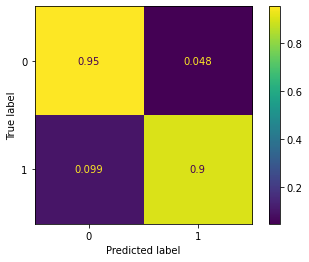

In [126]:
from sklearn.metrics import plot_confusion_matrix

# Get confusion matrix for Gradient Boosting Classifier
plot_confusion_matrix(xg_model,X_Val, y_val,normalize='true')

In [127]:
# Import GridSearchCV
from sklearn.model_selection import GridSearchCV

# Optimize model parameters
# I run this code in google colab to make the execution much faster and use the best params in the next code
param_grid = {'min_child_weighth': [1, 5, 10],
        'gamma': [0.5, 1],
        'subsample': [0.6, 0.8, 1.0],
        'max_depth': [3, 5]
        }
my_xgb_model = GridSearchCV(xg_model, param_grid,n_jobs=-1,verbose=2,cv=5)
my_xgb_model.fit(X_train1, y_train)
print(my_xgb_model.best_params_) 

Fitting 5 folds for each of 36 candidates, totalling 180 fits
[09:07:41] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "min_child_weighth" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


{'gamma': 0.5, 'max_depth': 3, 'min_child_weighth': 1, 'subsample': 0.8}


In [128]:
from sklearn.metrics import confusion_matrix, accuracy_score

# fit by setting best parameters and Evaluate model
xgb_model = XGBClassifier(min_child_weight=1, gamma=0.5, subsample=0.8, max_depth=3)

xgb_model.fit(X_train1, y_train)
y_pred = xgb_model.predict(X_Val)

# Get error rate
print("Error rate of the XGB classifier: ", 1 - accuracy_score(y_val, y_pred))

Error rate of the XGB classifier:  0.32005936186000494


In [233]:
test.bank_account = xgb_model.predict(test1)

In [130]:
# Create submission DataFrame
submission = pd.DataFrame({"uniqueid": test["uniqueid"] + " x " + test["country"],
                           "bank_account": test.bank_account})

In [131]:
#show the five sample
submission.sample(5)

,uniqueid,bank_account
5885,uniqueid_12020 x Rwanda,1
626,uniqueid_6695 x Kenya,0
6391,uniqueid_6666 x Tanzania,0
2135,uniqueid_8204 x Kenya,0
5056,uniqueid_11191 x Rwanda,0


In [81]:
# Create submission csv file csv file
submission.to_csv('second_submission.csv', index = False)

Using lightgbm

In [184]:

from sklearn.feature_selection import SelectFromModel
from lightgbm import LGBMClassifier

lgbc=LGBMClassifier(n_estimators=500, learning_rate=0.05, num_leaves=32, colsample_bytree=0.2,
            reg_alpha=3, reg_lambda=1, min_split_gain=0.01, min_child_weight=40)

embeded_lgb_selector = SelectFromModel(lgbc, max_features=8)
embeded_lgb_selector.fit(X_train1, y_train)

embeded_lgb_support = embeded_lgb_selector.get_support()
embeded_lgb_feature = X_train2.loc[:,embeded_lgb_support].columns.tolist()
print(str(len(embeded_lgb_feature)), 'selected features')

5 selected features


In [185]:
embeded_lgb_feature

[0, 1, 3, 4, 5]

In [193]:
X_train3=X_train2.iloc[:, [0, 1, 3, 4, 5]]
X_train3

,0,1,3,4,5
0,1.0,0.0,0.10,0.095238,0.0
1,1.0,0.0,0.20,0.642857,0.0
2,1.0,1.0,0.20,0.119048,1.0
3,1.0,0.0,0.20,0.214286,0.0
4,1.0,1.0,0.35,0.119048,1.0
...,...,...,...,...,...
23519,1.0,0.0,0.15,0.380952,0.0
23520,1.0,0.0,0.05,0.130952,0.0
23521,1.0,0.0,0.20,0.130952,0.0
23522,1.0,1.0,0.30,0.166667,0.0


In [194]:
lgbc=LGBMClassifier()
lgbc.fit(X_train3, y_train)

LGBMClassifier()

In [198]:
# evaluate the model
lgbc_= lgbc.predict(X_Val)

# Get error rate
print("Error rate of XGB classifier: ", 1 - accuracy_score(y_val, lgbc_))

Error rate of XGB classifier:  0.12962175945601362


Using Random Forest

In [202]:
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier

embeded_rf_selector = SelectFromModel(RandomForestClassifier(n_estimators=100), max_features=10)
embeded_rf_selector.fit(X_train2, y_train)

embeded_rf_support = embeded_rf_selector.get_support()
embeded_rf_feature = X_train2.loc[:,embeded_rf_support].columns.tolist()
print(str(len(embeded_rf_feature)), 'selected features')

8 selected features


In [203]:
embeded_rf_feature

[1, 2, 3, 4, 21, 22, 25, 26]

In [205]:
X_train4=X_train2.iloc[:, [1, 2, 3, 4, 21, 22, 25, 26]]
X_train4

,1,2,3,4,21,22,25,26
0,0.0,1.0,0.10,0.095238,0.0,0.0,0.0,0.0
1,0.0,0.0,0.20,0.642857,0.0,0.0,0.0,0.0
2,1.0,1.0,0.20,0.119048,0.0,1.0,0.0,0.0
3,0.0,1.0,0.20,0.214286,0.0,0.0,0.0,1.0
4,1.0,0.0,0.35,0.119048,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...
23519,0.0,1.0,0.15,0.380952,0.0,0.0,0.0,0.0
23520,0.0,1.0,0.05,0.130952,0.0,0.0,0.0,0.0
23521,0.0,1.0,0.20,0.130952,0.0,0.0,0.0,0.0
23522,1.0,1.0,0.30,0.166667,0.0,0.0,0.0,0.0


In [248]:
test11=pd.DataFrame(test1)

In [249]:
test2=test11.iloc[:, [1, 2, 3, 4, 21, 22, 25, 26]]
test2

,1,2,3,4,21,22,25,26
0,1.0,1.0,0.105263,0.166667,0.0,0.0,1.0,0.0
1,1.0,1.0,0.315789,0.416667,0.0,1.0,0.0,1.0
2,0.0,0.0,0.105263,0.726190,0.0,0.0,0.0,0.0
3,0.0,0.0,0.263158,0.273810,0.0,0.0,0.0,0.0
4,1.0,0.0,0.105263,0.000000,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...
10081,0.0,0.0,0.052632,0.547619,0.0,0.0,0.0,0.0
10082,1.0,1.0,0.368421,0.309524,0.0,0.0,0.0,0.0
10083,1.0,1.0,0.000000,0.273810,0.0,0.0,0.0,0.0
10084,0.0,1.0,0.263158,0.142857,0.0,0.0,0.0,0.0


In [271]:
rdc= RandomForestClassifier()
rdc.fit(X_train2, y_train)


RandomForestClassifier()

In [272]:
# evaluate the model
rdc1= rdc.predict(X_Val)

# Get error rate
print("Error rate of rdc classifier: ",  1- accuracy_score(y_val, rdc1))

Error rate of rdc classifier:  0.01869953251168721


In [273]:
test.bank_account = rdc.predict(test1)

In [274]:
# Create submission DataFrame
submission = pd.DataFrame({"uniqueid": test["uniqueid"] + " x " + test["country"],
                           "bank_account": test.bank_account})

In [275]:
#show the five sample
submission.sample(5)

,uniqueid,bank_account
5185,uniqueid_11320 x Rwanda,1
8266,uniqueid_8541 x Tanzania,0
5208,uniqueid_11343 x Rwanda,0
7603,uniqueid_7878 x Tanzania,0
3620,uniqueid_9755 x Rwanda,0


In [276]:
# Create submission csv file csv file
submission.to_csv('sixth_submission.csv', index = False)

### Feature Selection

using Chi square

In [294]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
data = train
X = X_train1  #independent columns
y = y_train    #target column i.e price range
#apply SelectKBest class to extract top 10 best features
bestfeatures = SelectKBest(score_func=chi2, k=10)
fit = bestfeatures.fit(X,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X_train2.columns)
#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns
print(featureScores.nlargest(10,'Score'))  #print 10 best features

    Specs        Score
26     26  1398.459048
21     21  1309.442224
25     25  1287.543695
22     22  1224.908523
33     33   605.482163
17     17   386.875887
19     19   323.840989
20     20   295.349066
2       2   266.843216
5       5   190.722499


[1.02386132e-02 3.55568988e-02 2.86180226e-02 1.51718306e-01
 3.50375854e-01 2.38548041e-02 6.79900251e-03 1.65870855e-02
 2.17777732e-03 3.84065199e-03 4.21093630e-03 5.78566482e-03
 7.37011099e-03 1.71652530e-04 1.26169157e-02 1.06687336e-02
 6.07183776e-03 1.92148109e-02 8.26876407e-04 2.48035241e-02
 2.04984616e-02 4.12598823e-02 3.10379690e-02 1.21353656e-03
 8.98244981e-03 3.55546789e-02 4.31950235e-02 5.04382344e-03
 1.27119585e-02 1.78316832e-03 8.01310924e-03 9.69220586e-03
 1.55894847e-02 1.95074664e-02 7.63833001e-03 1.10827599e-02
 5.68761272e-03]


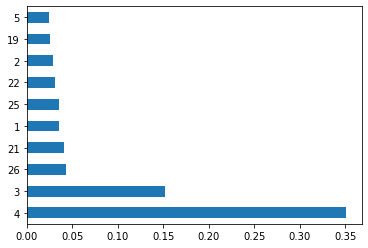

In [293]:
data = train
X = X_train1  #independent columns
y = y_train    #target column i.e price range
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
model = ExtraTreesClassifier()
model.fit(X,y)
print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X_train2.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()

In [295]:
X_train.head()

,country,year,uniqueid,location_type,cellphone_access,household_size,age_of_respondent,gender_of_respondent,relationship_with_head,marital_status,education_level,job_type
0,Kenya,2018,uniqueid_1,Rural,Yes,3,24,Female,Spouse,Married/Living together,Secondary education,Self employed
1,Kenya,2018,uniqueid_2,Rural,No,5,70,Female,Head of Household,Widowed,No formal education,Government Dependent
2,Kenya,2018,uniqueid_3,Urban,Yes,5,26,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed
3,Kenya,2018,uniqueid_4,Rural,Yes,5,34,Female,Head of Household,Married/Living together,Primary education,Formally employed Private
4,Kenya,2018,uniqueid_5,Urban,No,8,26,Male,Child,Single/Never Married,Primary education,Informally employed


In [ ]:
['country', 'year', 'location_type', 'cellphone_access', 'gender_of_respondent', 'relationship_with_head', 'marital_status', 'education_level', 'job_type'  ]

In [296]:
y_train.head()

0    1
1    0
2    1
3    0
4    0
Name: bank_account, dtype: int32

### Using Catboost

In [323]:
from catboost import CatBoostClassifier, Pool
X = X_train
y = y_train

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, 
                                                    random_state=1)

pool_train = Pool(X_train, y_train,
                  cat_features = ['country', 'year', 'location_type', 'cellphone_access', 'gender_of_respondent', 'relationship_with_head', 'marital_status', 'education_level', 'job_type'  ])

pool_test = Pool(X_test, cat_features = ['country', 'year', 'location_type', 'cellphone_access', 'gender_of_respondent', 'relationship_with_head', 'marital_status', 'education_level', 'job_type'  ])


#CatBoost

import time

start = time.time()

cbr = CatBoostClassifier(iterations=100,max_depth=2)

cbr.fit(pool_train)
y_pred = cbr.predict(X_test)

from sklearn.metrics import r2_score as RSquared


cb_rsquared =  1- accuracy_score(y_test, y_pred)
print(cb_rsquared)
#print("R Squared for CatBoost: ", np.mean(cb_rsquared))

end = time.time()
diff = end - start
print('Execution time:', diff)

Learning rate set to 0.10443
0:	learn: 0.6415269	total: 5.03ms	remaining: 498ms
1:	learn: 0.6009562	total: 13.6ms	remaining: 666ms
2:	learn: 0.5657144	total: 19.6ms	remaining: 632ms
3:	learn: 0.5380973	total: 30.8ms	remaining: 740ms
4:	learn: 0.5134686	total: 47.7ms	remaining: 907ms
5:	learn: 0.4930667	total: 53.9ms	remaining: 845ms
6:	learn: 0.4769960	total: 61.2ms	remaining: 814ms
7:	learn: 0.4633972	total: 70.6ms	remaining: 812ms
8:	learn: 0.4448686	total: 78.4ms	remaining: 792ms
9:	learn: 0.4286390	total: 86.8ms	remaining: 781ms
10:	learn: 0.4144385	total: 94.2ms	remaining: 762ms
11:	learn: 0.4037151	total: 102ms	remaining: 749ms
12:	learn: 0.3927957	total: 110ms	remaining: 734ms
13:	learn: 0.3852216	total: 117ms	remaining: 720ms
14:	learn: 0.3776193	total: 125ms	remaining: 707ms
15:	learn: 0.3720551	total: 133ms	remaining: 696ms
16:	learn: 0.3673960	total: 140ms	remaining: 684ms
17:	learn: 0.3632308	total: 148ms	remaining: 673ms
18:	learn: 0.3581050	total: 155ms	remaining: 661ms
1

In [325]:
test3 =test.drop(["uniqueid"], axis=1)

In [326]:
test.bank_account = cbr.predict(test3)

In [327]:
# Create submission DataFrame
submission = pd.DataFrame({"uniqueid": test["uniqueid"] + " x " + test["country"],
                           "bank_account": test.bank_account})

In [328]:
#show the five sample
submission.sample(5)

,uniqueid,bank_account
7844,uniqueid_8119 x Tanzania,0
586,uniqueid_6655 x Kenya,0
6754,uniqueid_7029 x Tanzania,0
589,uniqueid_6658 x Kenya,0
4637,uniqueid_10772 x Rwanda,0


In [329]:
# Create submission csv file csv file
submission.to_csv('last_submission.csv', index = False)

In [331]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.88      0.99      0.93       340
           1       0.87      0.31      0.46        64

    accuracy                           0.88       404
   macro avg       0.88      0.65      0.70       404
weighted avg       0.88      0.88      0.86       404



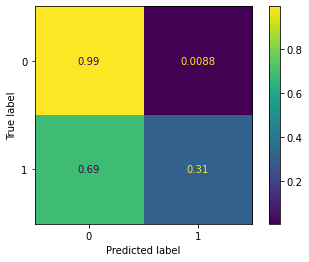

In [333]:
# Get confusion matrix for Gradient Boosting Classifier
plot_confusion_matrix(cbr,X_test,y_test,normalize='true')